**Laptops have become one of the most sought-after consumer products in the fast-evolving technology market. With more varied specifications coming to the market to cater to diverse needs, there is a whole set of factors, such as processor type, RAM size, storage capacity, and screen size, on which consumers weigh their decision, while factors such as software bundles like Microsoft Office play a much larger role.**

**With regards to the purchases of laptops, consumers are constantly having to make many choices. Among those factors are the performance specifications - processor type, storage configuration - but also a certain software bundle that comes with a laptop, for example, Microsoft Office. Such a bundle is likely to drive up the price of a laptop but may have a positive impact on the overall user experience and, therefore, on user ratings.**


**Objectives**
**The objectives of this analysis are as follows:**

* **Analyze and write about price differences in laptops with and without Microsoft Office by processor types and  and RAM size.**
* **Compare user ratings of laptops both with and without discount.**
* **Analyze how processor type (Intel Core i3, i5, Ryzen)correlates to the price .**


**Overview of the Methodology**
* **Data Collection**
* **Feature Engineering**
* **Statistical Analysis**
* **Data Visualisation**

**Import Essential Libraries**

In [697]:
import numpy as np #for numerical analysis
import pandas as pd #for data analysis
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns #for data visualisation
from wordcloud import WordCloud

**Loading Dataset**

In [700]:
df=pd.read_csv('_laptop_data.csv')

**First View of Dataset**

In [703]:
df.head()

,title,actual_price,dis,after_dis_price,link,rating,no_of_rating
0,Lenovo IdeaPad Slim 3 Intel Core i3 12th Gen 1...,"58,890",45% off,"31,990",https://www.flipkart.com/lenovo-ideapad-slim-3...,4.3,"1,558 Ratings & 86 Reviews"
1,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,"39,990",52% off,"18,990",https://www.flipkart.com/chuwi-intel-celeron-d...,3.7,"1,112 Ratings & 129 Reviews"
2,Infinix Y3 Max Series Intel Core i5 12th Gen 1...,"69,990",57% off,"29,990",https://www.flipkart.com/infinix-y3-max-series...,4.2,64 Ratings & 13 Reviews
3,Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...,"58,390",36% off,"36,990",https://www.flipkart.com/lenovo-ideapad-slim-1...,4.2,"5,823 Ratings & 509 Reviews"
4,Infinix Y3 Max Series Intel Core i5 12th Gen 1...,"69,990",57% off,"29,990",https://www.flipkart.com/infinix-y3-max-series...,4.2,64 Ratings & 13 Reviews


**No of rows and columns**

In [706]:
df.shape

(324, 7)

**Dataset information**

In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            324 non-null    object 
 1   actual_price     324 non-null    object 
 2   dis              324 non-null    object 
 3   after_dis_price  324 non-null    object 
 4   link             324 non-null    object 
 5   rating           324 non-null    float64
 6   no_of_rating     324 non-null    object 
dtypes: float64(1), object(6)
memory usage: 17.8+ KB


**Duplicate values**

In [712]:
len(df[df.duplicated()])

0

**Null values**

In [715]:
df.isnull().sum()

title              0
actual_price       0
dis                0
after_dis_price    0
link               0
rating             0
no_of_rating       0
dtype: int64

**What did you know about your dataset**
* There are 324 rows and 7 columns present in the dataset.
* actual_price,dis,after_dis_price,no_of_rating has object data type so need to change it to its correct data type.

**Data cleaning  and Feature Engineering**

changing datatype of actual_price

In [720]:
df['actual_price']=df['actual_price'].replace({',':''},regex=True)
df['actual_price']=df['actual_price'].astype(float)

extracting numerical value from dis and changing its data type to int

In [723]:
df['dis']=df['dis'].str.extract(r'(\d+)',expand=False)
df['discount']=df['dis'].astype(int)
df.drop('dis',axis=1,inplace=True)

changing data type of after_dis_price

In [726]:
df['after_dis_price']=df['after_dis_price'].replace({',':''},regex=True)
df['after_dis_price']=df['after_dis_price'].astype(float)

extracting num_rating from no_of_rating and changing its data type

In [729]:
df['num_ratings'] = df['no_of_rating'].str.extract(r'([0-9,]+)\sRatings')[0]
df['num_ratings']=df['num_ratings'].replace({',': ''}, regex=True).astype(int)

extracting num_reviews from no_of_rating and changing its data type

In [732]:
df['num_reviews'] = df['no_of_rating'].str.extract(r'&\s([0-9,]+)\sReviews')[0]
df['num_reviews'] = df['num_reviews'].replace({',': ''}, regex=True).astype(int)

In [734]:
df.drop('no_of_rating',axis=1,inplace=True)

extracting brand name from title

In [737]:
df['brand']=df['title'].str.split().str[0]

creating a new column ram and extracting its data from title

In [740]:
df['ram'] = df['title'].str.extract(r'(\d+)\s*(GB|gb|G|g)\b')[0].astype(float)

creating a new column display_size and extracting its data from title

In [743]:
df['display_size'] = df['title'].str.extract(r'(?i)(\d+(\.\d+)?)\s*(inch|cm)')[0]

In [745]:
df['display_size']=df['display_size'].astype(float)

creating a new column weight and extracting its data from title

In [748]:
df['title'] = df['title'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [750]:
df['weight'] = df['title'].str.extract(r'(\d+\.\d+)\s*(kg|KG|Kg|kG)')[0]


In [752]:
df['weight']=df['weight'].astype(float)

creating a new column color and extracting its data from title

In [830]:
df['color'] = df['title'].str.extract(r'(\w+(\s\w+)*)\s*,\s*(\d+\.\d+|[\d]+)\s*(kg|Kg|KG)')[0]


In [834]:
df.dtypes

title               object
actual_price       float64
after_dis_price    float64
link                object
rating             float64
discount             int64
num_ratings          int64
num_reviews          int64
brand               object
ram                float64
display_size       float64
weight             float64
color               object
dtype: object

In [836]:
df.columns

Index(['title', 'actual_price', 'after_dis_price', 'link', 'rating',
       'discount', 'num_ratings', 'num_reviews', 'brand', 'ram',
       'display_size', 'weight', 'color'],
      dtype='object')

**Stastical Analysis**

In [839]:
df.describe()

,actual_price,after_dis_price,rating,discount,num_ratings,num_reviews,ram,display_size,weight
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,309.000000
mean,70738.135802,48945.712963,4.226543,31.370370,1655.851852,133.432099,12.209877,16.028086,1.692411
std,28321.589257,23117.564392,0.216300,10.967381,3125.137154,242.916716,4.927250,4.719868,0.312222
min,18990.000000,10990.000000,3.400000,5.000000,3.000000,0.000000,4.000000,7.000000,0.990000
25%,50843.000000,32496.750000,4.100000,24.000000,78.750000,9.000000,8.000000,14.000000,1.500000
50%,66990.000000,43444.500000,4.200000,31.000000,317.500000,29.500000,14.000000,15.600000,1.670000
75%,84990.000000,59990.000000,4.300000,38.000000,1540.750000,134.000000,16.000000,15.600000,1.780000
max,174890.000000,134990.000000,5.000000,62.000000,15734.000000,2173.000000,32.000000,39.620000,2.800000


**Variables Description**
*  **title**: The full title or name of the product that usually has the information about the brand, model, specifications, and other features.
* **actual_price**: It is the price of the original product before discounts.
* **after_dis_price**: Price of the product after discount is applied
* **link**: URL to the page where the product is found
* **rating**: Average rating for the product; this can be between 1 and 5 stars.
* **discount**: Percent discount in comparison to the normal price of the product.
* **num_ratings**: Total rating of the product given by customers.
* **num_reviews**: This relates to the total number of textual reviews given for the product; here, only the ratings of the stars are excluded.
* **ram**: This is the amount of Random Access Memory installed in the product.
* **display_size** The size of the display screen of the product that is shown usually in inches or centimeters.
* **weight** The weight of the product
* **color** The color or shade of the product
* **brand** the company that design and sells it.


**What is the average actual price of all products?**

In [843]:
df['actual_price'].mean()

70738.13580246913

**Observation:**
The average actual price of ₹70,738.14 likely reflects the presence of premium or mid-range laptops in the dataset, with higher-end models from brands like Lenovo and Infinix influencing the average.

**What is the average price after discount of all products?**

In [846]:
df['after_dis_price'].mean()

48945.71296296296

**Observation:**
The average price after discount (₹48,945.71) is significantly lower than the average actual price of ₹70,738.14, which suggests that most of the products in the dataset are being offered at a discount.

**How many products have a discount of more than 50%?**

In [849]:
df[df['discount']>50].shape[0]

21

**Observation:**
The 21 items with discounts more than 50% account for about 6.48% of the whole dataset (21 out of 324).
This implies that although most of the products could be discounted in the 30-50% range.

**Which product has the highest rating?**

In [852]:
df[df['rating']==df['rating'].max()]['title']

291    ASUS TUF Gaming A16 Advantage Edition AMD Ryze...
Name: title, dtype: object

**Observation:**
The ASUS TUF Gaming A16 holds the highest possible rating of 5.0, which suggests that customers are extremely satisfied with the product.

**Which product has the lowest rating?**

In [855]:
df[df['rating']==df['rating'].min()]['title']

154    HP 250 G9 Intel Celeron Dual Core 12th Gen 450...
Name: title, dtype: object

**Observation:**
The HP 250 G9 has a 2.3 rating, which is significantly lower than most of the products in the dataset. A low rating like this generally indicates customer dissatisfaction with the product

**What is the most common brand in the dataset?**

In [858]:
df['brand'].mode()[0]

'ASUS'

**Observsation:**
ASUS is a highly popular brand in the laptop and electronics market, especially known for its gaming laptops and high-performance computers. 

**What is the average number of ratings per product?**

In [861]:
df['num_ratings'].mean()

1655.851851851852

**Observation:**
An average of 1655.85 ratings per product suggests that the products in the dataset have been reviewed many times, indicating a high level of customer engagement. 

**Which product has the most number of ratings?**

In [864]:
df[df['num_ratings'] == df['num_ratings'].max()]['title']

195    realme Book (Slim) Intel Core i3 11th Gen 1115...
Name: title, dtype: object

**Observation:**
Realme Book (Slim) Intel Core i3 11th Gen 1115 appears to have the highest number of ratings in this particular dataset.

**Which product has the most number of reviews?**

In [867]:
df[df['num_reviews'] == df['num_reviews'].max()]['title']

195    realme Book (Slim) Intel Core i3 11th Gen 1115...
Name: title, dtype: object

**Observation**
Realme Book (Slim) Intel Core i3 11th Gen 1115 appears to have the highest number of reviews in this particular dataset.

**What is the average weight of all products?**

In [870]:
df['weight'].mean()

1.6924110032362458

**What is the distribution of display sizes?**

In [873]:
df['display_size'].value_counts()

display_size
15.60    188
14.00     67
16.00     33
13.60      7
39.62      6
14.10      6
39.60      5
11.60      3
17.30      2
38.00      1
16.10      1
13.30      1
13.78      1
8.80       1
12.40      1
7.00       1
Name: count, dtype: int64

**Observation:**
The most frequent display size is 15.60 inches, with 188 products having this size. This suggests that 15.60 inches is a popular display size in the dataset.

**Which product has the highest price after discount?**

In [876]:
df[df['after_dis_price'] == df['after_dis_price'].max()]['title']

222    MSI Sword 16 HX Intel Core i9 13th Gen 13980HX...
Name: title, dtype: object

**Observation**
The MSI Sword 16 HX is the product that has the highest price after discount in the dataset.

**Which product has the lowest actual price?**

In [879]:
df[df['actual_price'] == df['actual_price'].min()]['title']

179    Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...
Name: title, dtype: object

**Observation**
The Primebook Wifi with MediaTek MT8183 is the product with the lowest actual price in the dataset.

**What is the average discount percentage across all products?**

In [882]:
df['discount'].mean()

31.37037037037037

**Which product offers the highest discount?**

In [885]:
df[df['discount'] == df['discount'].max()]['title']

94    Acer Chromebook Plus Google AI Intel Core i3 N...
Name: title, dtype: object

**Observation:**
The Acer Chromebook Plus with Google AI and Intel Core i3 is the product that offers the highest discount in the dataset.

**How many products have a rating of 4.5 or higher?**

In [888]:
df[df['rating'] >= 4.5].shape[0]

37

**Observation:**
There are 37 products that have a customer rating of 4.5 or higher, suggesting that these products are highly rated by customers.

**Which brand has the most products listed?**

In [891]:
df['brand'].value_counts().idxmax()

'ASUS'

**Observation:
ASUS has the highest number of products listed, suggesting that this brand is prominent in the dataset

**How many products have a weight above 2 kg?**

In [894]:
df[df['weight'] > 2].shape[0]

40

**Observation:**
There are 40 products that have a weight above 2 kg in the dataset.

**Which color is most common among the products?**

In [897]:
df['color'].mode()[0]

'Natural Silver'

**Observation:**
The most common color among the products is "Natural Silver".

**What is the correlation between actual price and rating?**

In [900]:
a=df['actual_price'].corr(df['rating'])
print("correlation between actual price and rating=",a)

correlation between actual price and rating= 0.43149123238616366


**Observation:**
A correlation of 0.43 suggests a moderate positive relationship between actual price and rating. This means that, generally, higher-priced products tend to have higher ratings, but this relationship is not extremely strong.

**Which product has the lowest number of reviews?**

In [903]:
df[df['num_reviews'] == df['num_reviews'].min()]['title']

48     ASUS Vivobook 15, with Backlit Keyboard, Intel...
62     Thomson Neo Metallic with Numeric Touch Pad In...
75     Lenovo Intel Core i3 12th Gen - (16 GB/512 GB ...
82     HP G9 AMD Ryzen 5 Hexa Core 5th Gen 5625U - (1...
85     ASUS Vivobook Intel Core i7 13th Gen 13700H - ...
128    Lenovo IdeaPad 5 Intel Core i5 13th Gen 13420H...
131    MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...
174    MSI Prestige 13 Evo AI PC Intel Core Ultra 5 1...
187    Acer Aspire Intel Core i3 13th Gen 1305U - (8 ...
204    ASUS Vivobook 16 Intel Core i5 12th Gen 12500H...
207    MSI Cyborg 14 Intel Core i5 13th Gen 13420H - ...
242    ASUS Vivobook 16 Intel Core i5 12th Gen 12500H...
248    Lenovo Yoga Slim 7 Intel Core Ultra 7 155H - (...
291    ASUS TUF Gaming A16 Advantage Edition AMD Ryze...
Name: title, dtype: object

**What is the average number of reviews per product?**

In [906]:
df['num_reviews'].mean()

133.4320987654321

**How many products are listed with a rating above 4.0?**

In [909]:
df[df['rating'] > 4.0].shape[0]

275

**Observation:**
There are 275 products with a rating greater than 4.0, indicating strong customer satisfaction for a significant portion of the dataset.

**What is the average number of RAM (in GB) across all products?**

In [912]:
df['ram'].mean()

12.209876543209877

**Observation:**
The average RAM across all products is approximately 12.21 GB. This suggests that many of the products are higher-end laptops with substantial memory.

**Which product has the highest RAM?**

In [915]:
df[df['ram'] == df['ram'].max()]['title']

180    Infinix ZEROBOOK 13 Intel Intel Core i9 13th G...
185    HP Pro G10 Intel Core i7 13th Gen 1335U Turbo ...
199    Infinix GT Book Intel Core i9 13th Gen 13900H ...
222    MSI Sword 16 HX Intel Core i9 13th Gen 13980HX...
Name: title, dtype: object

**How many products have more than 16 GB of RAM?**

In [918]:
df[df['ram'] > 16].shape[0]

9

**Observation:**
There are 9 products with more than 16 GB of RAM, which are likely high-performance machines designed for gaming or professional work.

**What is the most expensive product in the dataset?**

In [921]:
df[df['actual_price'] == df['actual_price'].max()]['title']

157    Lenovo Legion 5 Intel Core i7 13th Gen 13650HX...
160    Lenovo Legion 5 Intel Core i7 13th Gen 13650HX...
Name: title, dtype: object

**What is the most affordable product in the dataset?**

In [924]:
df[df['actual_price'] == df['actual_price'].min()]['title']


179    Primebook Wifi MediaTek MT8183 - (4 GB/64 GB E...
Name: title, dtype: object

**What percentage of products are under 25000?**

In [927]:
a=(df[df['actual_price'] < 25000].shape[0] / df.shape[0]) * 100
print(a)

1.8518518518518516


**Observation:**
1.85% of the products in the dataset are priced below ₹25,000, indicating that most products are in a mid-range to premium price category.

**Which display size is the most popular among products?**

In [930]:
df['display_size'].mode()[0]

15.6

**hat is the average price for each brand?**

In [933]:
df.groupby('brand')['actual_price'].mean()


brand
ASUS          71840.746269
Acer          65780.043478
Apple         99900.000000
CHUWI         40990.000000
Colorful     102499.000000
DELL          60604.363636
GIGABYTE     154300.000000
HP            60242.200000
Infinix       76234.375000
Lenovo        83236.101695
MICROSOFT     80999.000000
MSI           83490.000000
Primebook     21656.666667
SAMSUNG       77041.500000
Thomson       42490.000000
Ultimus       28659.666667
ZEBRONICS     60999.000000
realme        54999.000000
Name: actual_price, dtype: float64

**Which product has the most significant price drop from actual to after discount?**

In [936]:
df['price_drop'] = df['actual_price'] - df['after_dis_price']
df[df['price_drop'] == df['price_drop'].max()]['title']

103    GIGABYTE G Series Intel Core i5 12th Gen 12500...
Name: title, dtype: object

**Distribution of Actual Prices**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


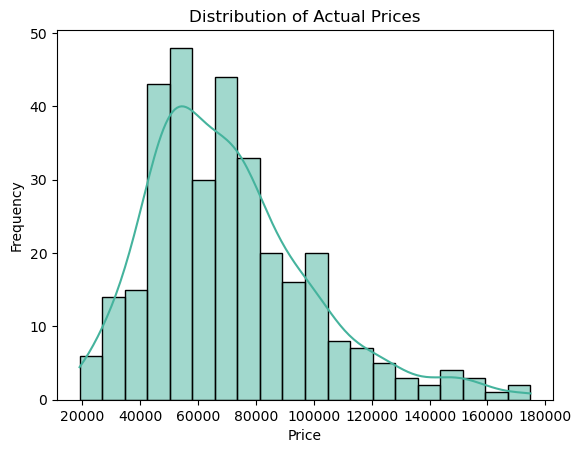

In [939]:
sns.histplot(df['actual_price'], bins=20, kde=True,color="#45b39d")
plt.title('Distribution of Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Observation:**
* There are products with prices as low as 20000 and as high as 180000.
* The peak of the distribution is around 60000 to 80000 range.This suggests that majority of products are within this range.

**Relationship between Actual Price and After Discount Price**

/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_97374/521274594.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='actual_price', y='after_dis_price', data=df,palette='Accent')


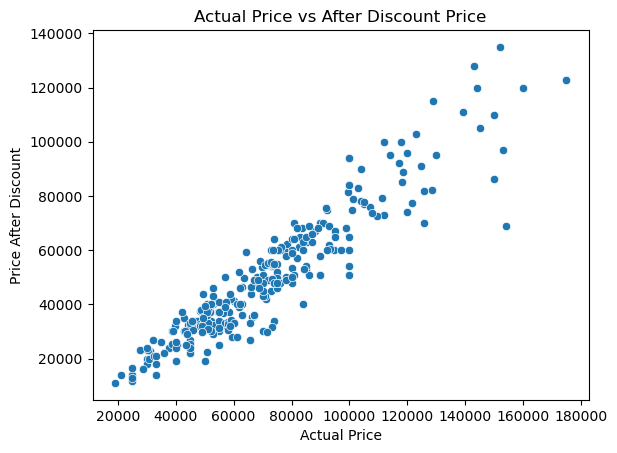

In [941]:
sns.scatterplot(x='actual_price', y='after_dis_price', data=df,palette='Accent')
plt.title('Actual Price vs After Discount Price')
plt.xlabel('Actual Price')
plt.ylabel('Price After Discount')
plt.show()

**Observation:**
There is a positive correlation between actual price and after dis price.This means that product with higher actual price have higher price after discount.

**Analyze how the discount percentage is distributed across the dataset**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


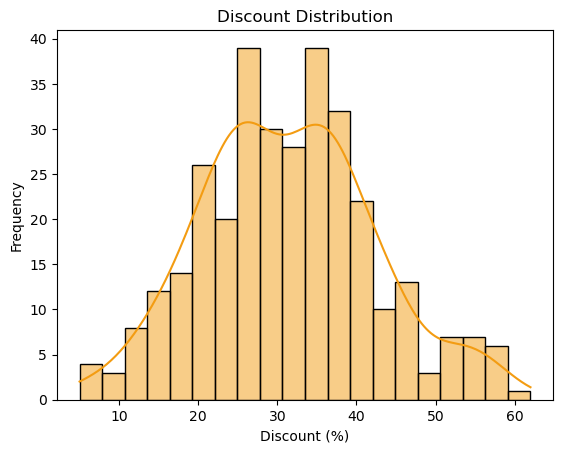

In [944]:
sns.histplot(df['discount'], bins=20, kde=True,color="#f39c12")
plt.title('Discount Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

**Observation:**
* There are discounts as low as 5% and as high as 60%.
* Most of the discounts are in the range 25-35%.

**Ratings Distribution**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


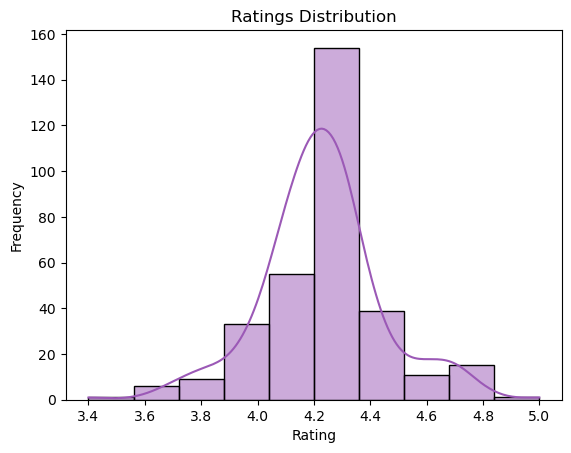

In [948]:
sns.histplot(df['rating'], bins=10, kde=True,color="#9b59b6")
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Observation:**
The Peak of the distribution seems to be around 4.2

**Analyze how the average rating varies by brand**

In [950]:
a=df.groupby('brand')['rating'].mean()
print(a)

brand
ASUS         4.292537
Acer         4.158696
Apple        4.700000
CHUWI        3.940000
Colorful     4.350000
DELL         4.163636
GIGABYTE     4.600000
HP           4.191667
Infinix      4.293750
Lenovo       4.194915
MICROSOFT    4.300000
MSI          4.315000
Primebook    4.166667
SAMSUNG      4.500000
Thomson      4.000000
Ultimus      3.800000
ZEBRONICS    3.900000
realme       4.400000
Name: rating, dtype: float64


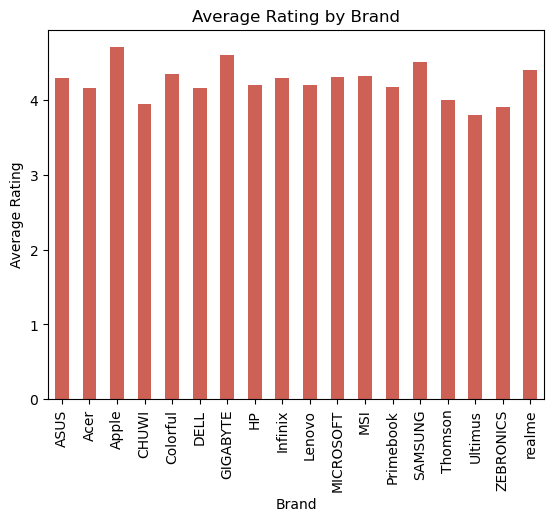

In [953]:
a.plot(kind='bar',color="#cd6155")
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

**Observation:**
* Overall, Apple stands out as the top performer in terms of customer ratings, followed by GIGABYTE, SAMSUNG, and realme.
* Brands that offer budget-friendly products like Thomson, ZEBRONICS, and Ultimus show lower ratings

**Average Price by Brand:**

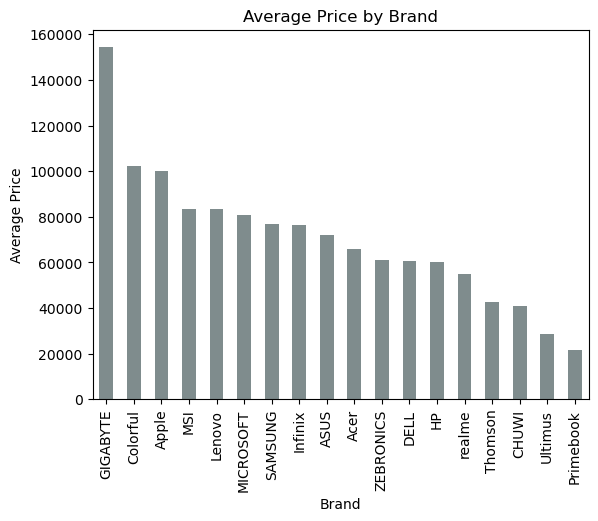

In [956]:
a=df.groupby('brand')['actual_price'].mean()
a.sort_values(ascending=False).plot(kind='bar',color="#7f8c8d")
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

**Observation:**
Gigabyte laptops have highest average price while Realme laptop have lowest.

**Distribution of RAM Size**

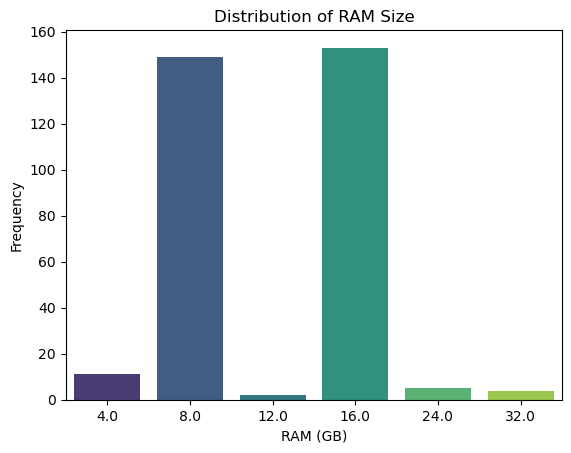

In [958]:
sns.countplot(x='ram', data=df,palette='viridis')
plt.title('Distribution of RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()

**Observation:**
16 GB ram is most common ram size followed bt 8 GB.

**Relationship Between RAM and Price**

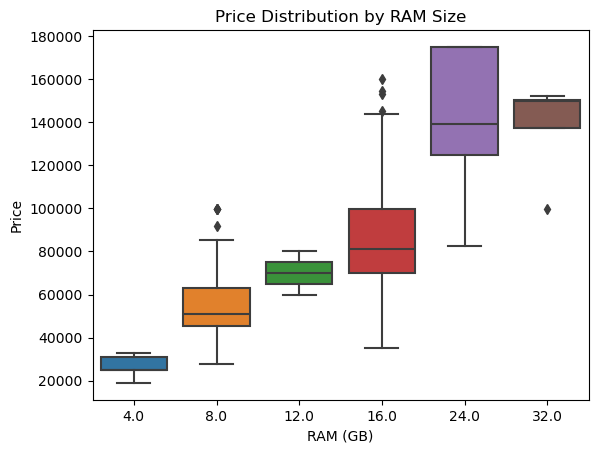

In [960]:
sns.boxplot(x='ram', y='actual_price', data=df)
plt.title('Price Distribution by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

**Observation:**
* As the RAM size increases median price also increases.
* There is more variability in prices of laptops with higher RAM sizes

**Price vs. Display Sizes**

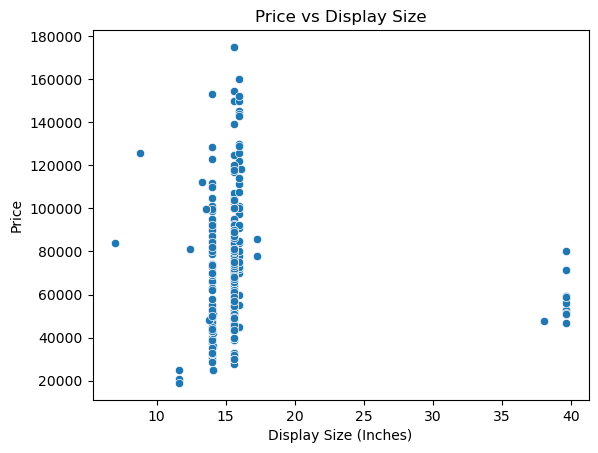

In [963]:
sns.scatterplot(x='display_size', y='actual_price', data=df)
plt.title('Price vs Display Size')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Price')
plt.show()


**What is the relationship between actual price and the number of reviews?**

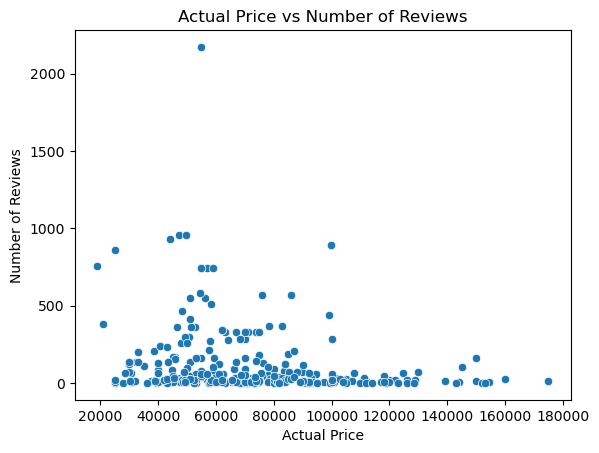

In [966]:
sns.scatterplot(x='actual_price', y='num_reviews', data=df)
plt.title('Actual Price vs Number of Reviews')
plt.xlabel('Actual Price')
plt.ylabel('Number of Reviews')
plt.show()

**Observation:**
* There is weak negative relationship between actual price and number of reviews.
* This suggests that, generally, higher-priced products tend to have slightly fewer reviews, though the relationship is not strong.

**How does the discount vary across laptop weights?**

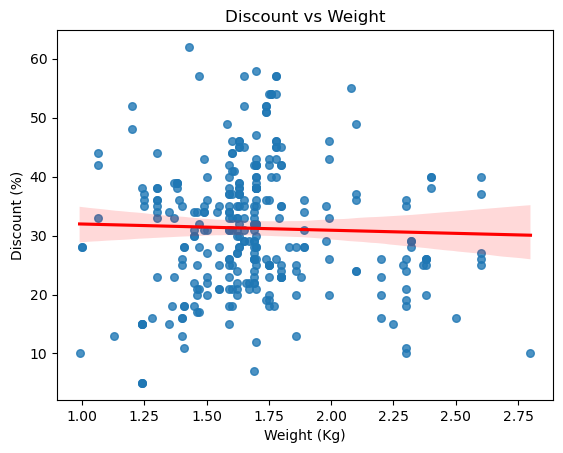

In [969]:
sns.regplot(x='weight', y='discount', data=df, scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Discount vs Weight')
plt.xlabel('Weight (Kg)')
plt.ylabel('Discount (%)')
plt.show()

**Observation:**
There is a weak negative correlation between laptop weight and discount.

**What is the relationship between the price after discount and the display size of laptops?**

/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_97374/3386447680.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='display_size', y='after_dis_price', data=df, jitter=True, dodge=True, palette='viridis')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


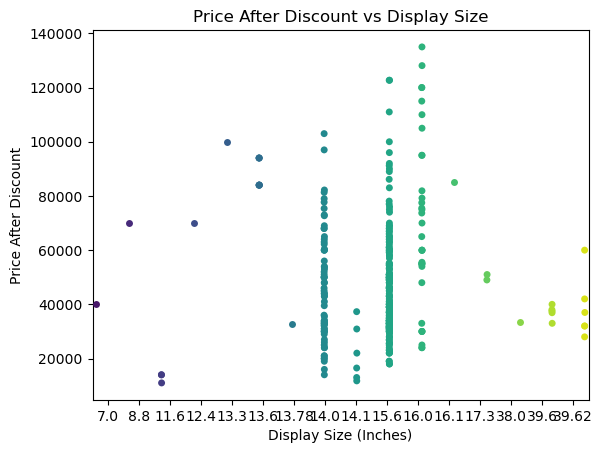

In [972]:
sns.stripplot(x='display_size', y='after_dis_price', data=df, jitter=True, dodge=True, palette='viridis')
plt.title('Price After Discount vs Display Size')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Price After Discount')
plt.show()

**Observation:**
The plot shows that there is a positive relationship between display size and price after discount. In other words, laptops with larger display sizes tend to be more expensive even after applying discounts.

**What is the price distribution of laptops with high RAM (16GB and above)?**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


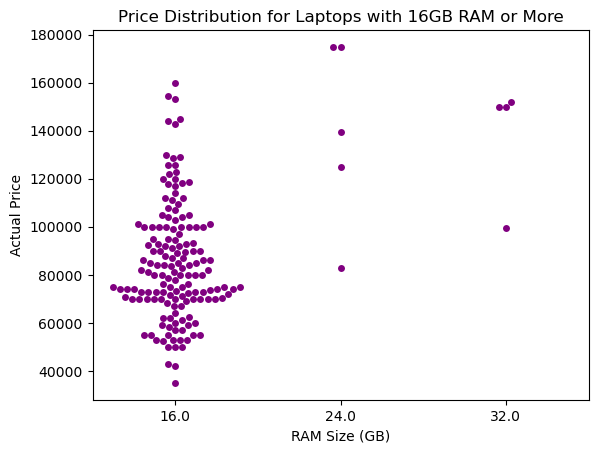

In [975]:
a= df[df['ram'] >= 16]
sns.swarmplot(x='ram', y='actual_price', data=a, color='purple')
plt.title('Price Distribution for Laptops with 16GB RAM or More')
plt.xlabel('RAM Size (GB)')
plt.ylabel('Actual Price')
plt.show()

**How do the number of reviews vary by display size?**

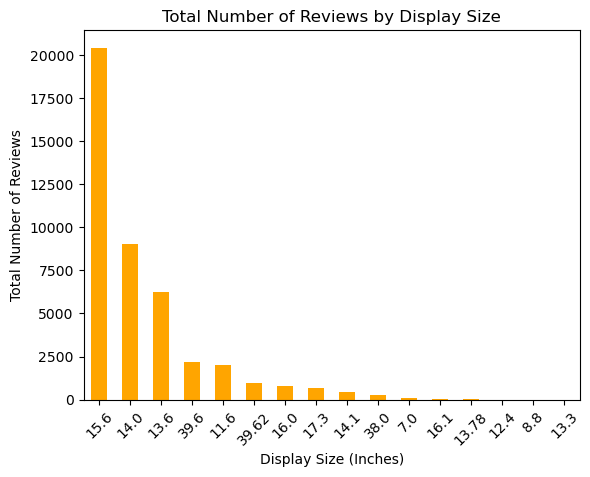

In [977]:
a= df.groupby('display_size')['num_reviews'].sum().sort_values(ascending=False)
a.plot(kind='bar', color='orange')
plt.title('Total Number of Reviews by Display Size')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

**Observation:**
The display size with highest no of reviews is 15.6.

**Which brand offers the highest average rating?**

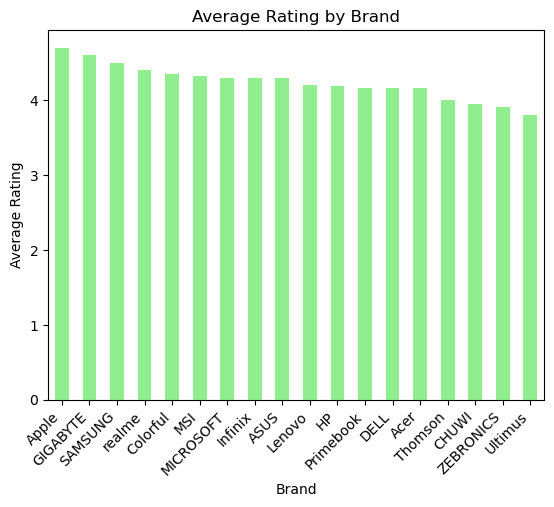

In [1223]:
a= df.groupby('brand')['rating'].mean().sort_values(ascending=False)
#print(a)
a.plot(kind='bar',color='lightgreen')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45,ha='right')
plt.show()


**What is the correlation between display size and price ?**

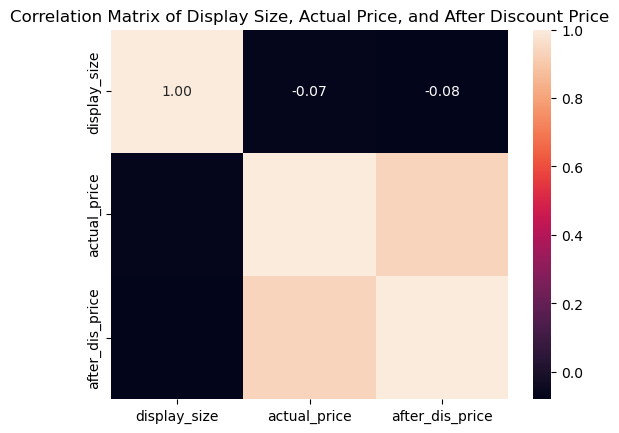

In [982]:
a= df[['display_size', 'actual_price', 'after_dis_price']].corr()
sns.heatmap(a, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Display Size, Actual Price, and After Discount Price')
plt.show()


**Observation:**
* There is a strong correlation between display size and actual price i.e. laptops with larger displays tend to be more expensive.
* There is a moderate positive correlation between display size and after price dis.
* There is a weak negative correlation between actual price and price after dis.

**How does the discount percentage impact the average rating?**

/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_97374/3566114824.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a=df.groupby('discount_range')['rating'].mean()


discount_range
0-10%     4.457143
10-20%    4.325581
20-30%    4.248113
30-40%    4.206422
40-50%    4.165789
50-60%    4.065000
60-70%    3.800000
70%+           NaN
Name: rating, dtype: float64


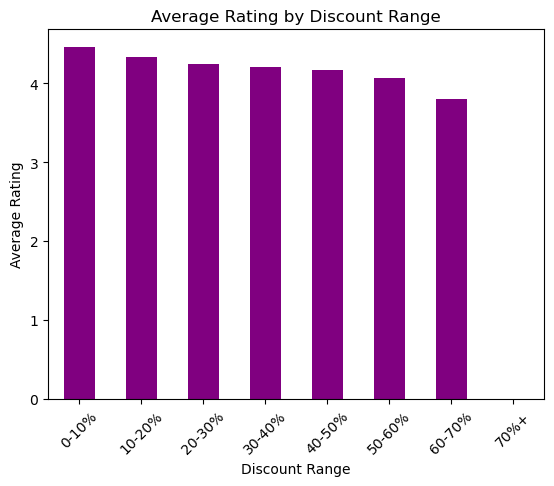

In [1226]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70%+']
df['discount_range'] = pd.cut(df['discount'], bins=bins, labels=labels)
a=df.groupby('discount_range')['rating'].mean()
print(a)
a.plot(kind='bar',color='purple')
plt.title('Average Rating by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**Observation:**
As the discount percentage increases, the average rating tends to decrease. This suggests a negative relationship between discount percentage and average rating.

**What is the price distribution for laptops with 8GB RAM or higher?**

/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_97374/939837405.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(a['actual_price'], shade=True, color='blue')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


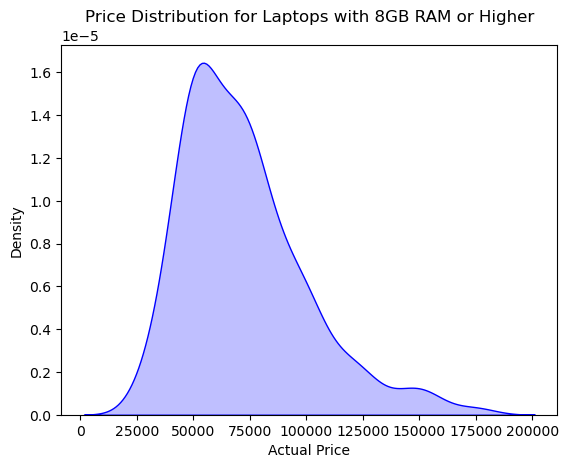

In [987]:
a= df[df['ram'] >= 8]
sns.kdeplot(a['actual_price'], shade=True, color='blue')
plt.title('Price Distribution for Laptops with 8GB RAM or Higher')
plt.xlabel('Actual Price')
plt.ylabel('Density')
plt.show()


**Observation:**
The distribution is rightly skewed i.e there are more laptops in lower price range and fewer in high price range.

**Which display size category has the highest number of laptops priced above 50,000?**

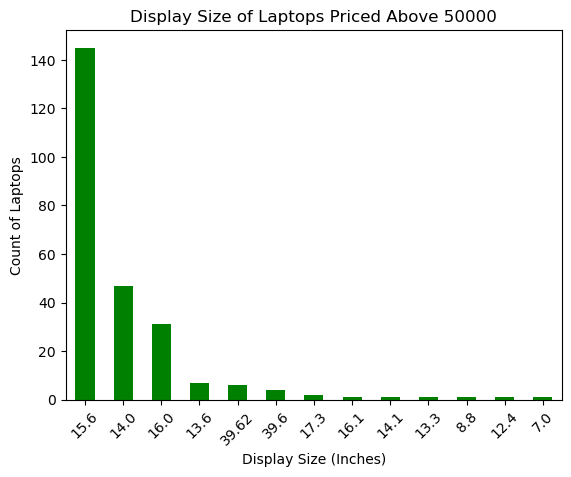

In [989]:
a= df[df['actual_price'] > 50000]
b= a['display_size'].value_counts()
b.plot(kind='bar', color='green')
plt.title('Display Size of Laptops Priced Above 50000')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Count of Laptops')
plt.xticks(rotation=45)
plt.show()


**What is the correlation between the number of reviews and the number of ratings?**

In [992]:
a= df['num_reviews'].corr(df['num_ratings'])
print("Correlation between reviews and ratings=",a)


Correlation between reviews and ratings= 0.9338736045556979


**Observation:**
Strong positive correlation: As the number of reviews increases, it's likely that the ratings are also higher, or both factors tend to move in the same direction.

**Which brand has the highest average actual price?**

In [994]:
a=df.groupby('brand')['actual_price'].mean()
print("Brand with highest average actual price is",a.idxmax())


Brand with highest average actual price is GIGABYTE


**What is the price distribution for gaming laptops?**

In [997]:
gaming= df[df['title'].str.contains('gaming', case=False)]
print(gaming.shape[0])

60


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


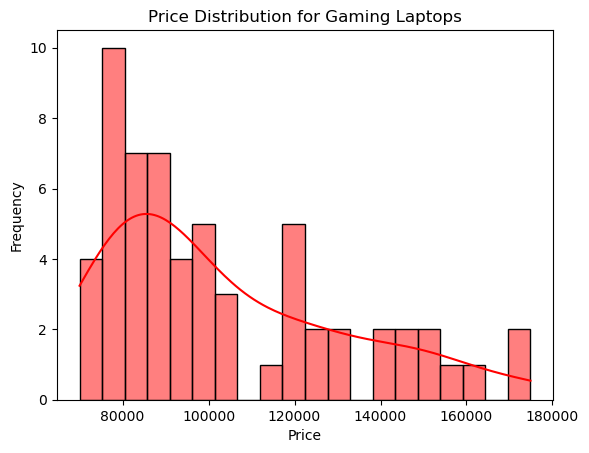

In [1005]:
sns.histplot(gaming['actual_price'], bins=20, kde=True, color='red')
plt.title('Price Distribution for Gaming Laptops')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Observation:**
The distribution is skewed to right i.e that there are more gaming laptops in the lower price range and fewer in the higher price range.

**What is the price range for laptops with specific colors?**

In [1008]:
a= df.groupby('color')['actual_price'].agg(['min', 'max'])
print(a)


                         min       max
color                                 
Abyss Blue           28690.0   30790.0
Abyssal Black       142999.0  142999.0
Arctic Grey          49990.0  128590.0
Black                24990.0  154300.0
Blue                 29990.0   69990.0
...                      ...       ...
Translucent Black    89990.0   94990.0
Transparent Silver   32990.0   72990.0
Trial office 365     73412.0   73412.0
Urban Silver         44990.0   44990.0
White                99999.0   99999.0

[65 rows x 2 columns]


**Observation:**
* Premium Colors: Those colors include more expensive colors, such as Abyssal Black, Arctic Grey, and Translucent Black. The highest price goes beyond ₹1 lakh.
* Budget Colors: Blue and Black are at lower price points but cover a wide range of price points, showing that the colors are well-liked both in budget and mid-range.
* Narrow Range Colors: Some colors, such as Trial office 365, White, have a very narrow price range, which may show limited product offerings or special models that have set prices.

**What is the price difference between the highest and lowest-rated products?**

In [1011]:
highest= df[df['rating'] == df['rating'].max()]
lowest= df[df['rating'] == df['rating'].min()]
price= highest['actual_price'].values[0] - lowest['actual_price'].values[0]
print("Price difference between the highest and lowest rated products=",price)


Price difference between the highest and lowest rated products= 83090.0


**Observation:**
The highest-rated product is priced ₹83,090 more expensive than the lowest-rated product.

**How many products have no reviews or ratings?**

In [1015]:
a= df[(df['num_reviews'] == 0) | (df['num_ratings'] == 0)]
print("Number of products with no reviews or ratings=",a.shape[0])


Number of products with no reviews or ratings= 14


**How does the average price vary by screen size?**

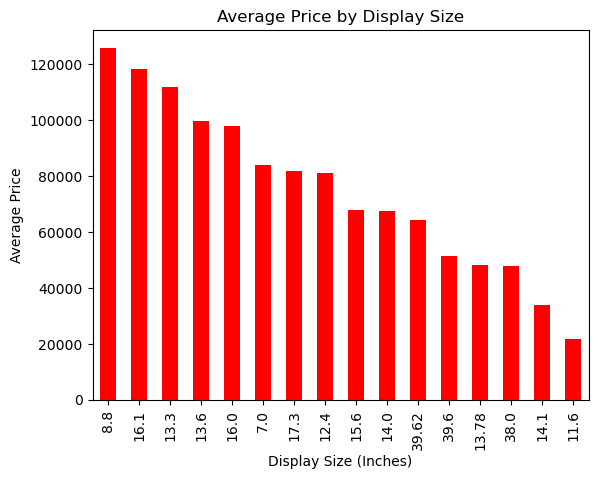

In [1018]:
a= df.groupby('display_size')['actual_price'].mean()
a.sort_values(ascending=False).plot(kind='bar', color='r')
plt.title('Average Price by Display Size')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Average Price')
plt.show()


**What is the distribution of the number of reviews based on rating?**

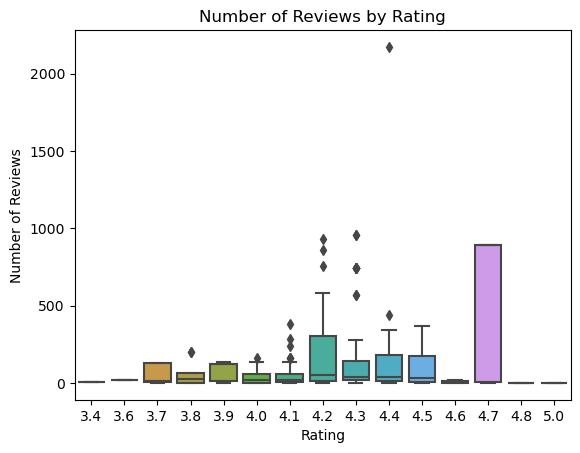

In [1021]:
sns.boxplot(x='rating', y='num_reviews', data=df)
plt.title('Number of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

**What is the effect of a price drop on customer ratings?**

In [1024]:
df['price_drop'] = df['actual_price'] - df['after_dis_price']

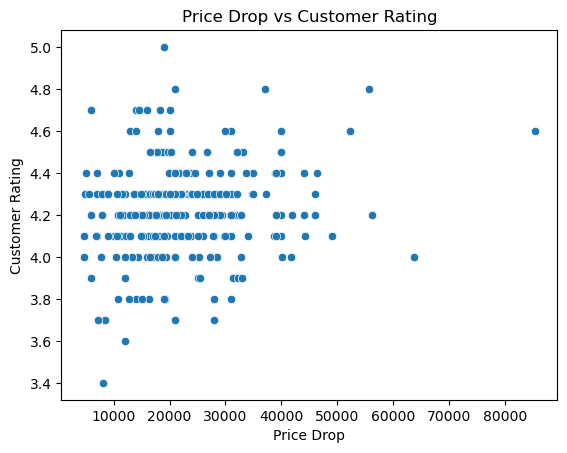

In [1026]:
sns.scatterplot(x='price_drop', y='rating', data=df)
plt.title('Price Drop vs Customer Rating')
plt.xlabel('Price Drop')
plt.ylabel('Customer Rating')
plt.show()

**Observation:**
There doesn't appear to be a strong or consistent relationship between the price drop and customer ratings.

**Which product offers the best value for money (high rating, low price)?**

In [1029]:
df['value_for_money'] = df['rating'] / df['actual_price']
a= df.loc[df['value_for_money'].idxmax()]
print("Best value for money product is",a["title"])


Best value for money product is Primebook Wifi MediaTek MT8183 - (4 GB/64 GB EMMC Storage/Prime OS) PB Wifi Thin and Light Laptop (11.6 Inch, Royal Black, 1.065 Kg)


**What is the price difference between gaming and non-gaming laptops?**

In [1032]:
df['is_gaming'] = df['title'].str.contains('gaming', case=False)
gaming =df[df['is_gaming'] == True]
non_gaming= df[df['is_gaming'] == False]
a=gaming["actual_price"].mean()
b=non_gaming["actual_price"].mean()
print("Gaming laptops average price=",a)
print("Non-gaming laptops average price=",)
diff=a-b
print("differnece=",diff)

Gaming laptops average price= 103615.31666666667
Non-gaming laptops average price=
differnece= 40349.267424242425


**Observation:**
The average price of gaming laptop is more (40349.26) than that of non-gaming laptop as usually gaming laptop have highe-end specification.

**What is the trend of the rating of products by display_size?**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


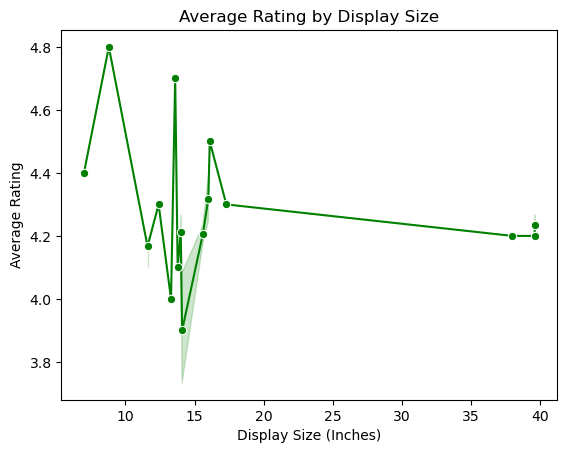

In [1035]:
sns.lineplot(x='display_size', y='rating', data=df, marker='o', color='g')
plt.title('Average Rating by Display Size')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Average Rating')
plt.show()


**Observation:**
* The average rating initially increases sharply with display size, reaching a peak around 10 inches.
*  After this peak, the average rating generally declines as the display size increases further.
* The decline seems to slow down and stabilize around 30 inches.

**What is the trend of actual_price vs after_dis_price over the rating?**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

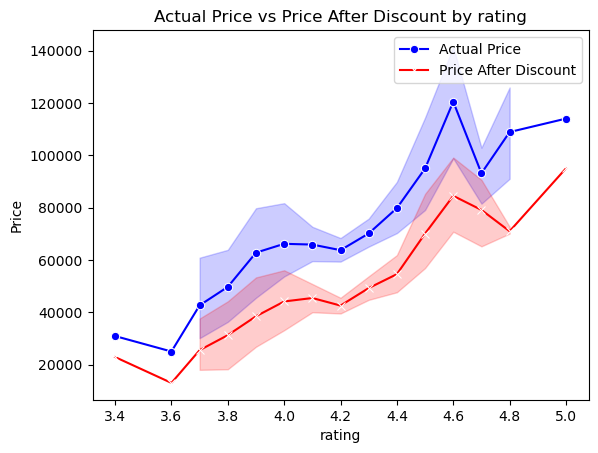

In [1038]:
sns.lineplot(x='rating', y='actual_price', data=df, label='Actual Price', marker='o', color='b')
sns.lineplot(x='rating', y='after_dis_price', data=df, label='Price After Discount', marker='x', color='r')
plt.title('Actual Price vs Price After Discount by rating')
plt.xlabel('rating')
plt.ylabel('Price')
plt.legend()
plt.show()


**What processor types are mentioned in the product titles?**

In [1041]:
def processor(title):
    title = title.lower()
    if 'intel core i3' in title:
        if '12th gen' in title:
            return 'Intel i3 (12th Gen)'
        elif '11th gen' in title:
            return 'Intel i3 (11th Gen)'
        elif '10th gen' in title:
            return 'Intel i3 (10th Gen)'
        else:
            return 'Intel i3 (Unknown Generation)'
    
    elif 'intel core i5' in title:
        if '12th gen' in title:
            return 'Intel i5 (12th Gen)'
        elif '11th gen' in title:
            return 'Intel i5 (11th Gen)'
        elif '10th gen' in title:
            return 'Intel i5 (10th Gen)'
        else:
            return 'Intel i5 (Unknown Generation)'
    
    elif 'intel core i7' in title:
        if '12th gen' in title:
            return 'Intel i7 (12th Gen)'
        elif '11th gen' in title:
            return 'Intel i7 (11th Gen)'
        elif '10th gen' in title:
            return 'Intel i7 (10th Gen)'
        else:
            return 'Intel i7 (Unknown Generation)'
    
    elif 'intel core i9' in title:
        if '12th gen' in title:
            return 'Intel i9 (12th Gen)'
        elif '11th gen' in title:
            return 'Intel i9 (11th Gen)'
        elif '10th gen' in title:
            return 'Intel i9 (10th Gen)'
        else:
            return 'Intel i9 (Unknown Generation)'
    elif 'intel celeron' in title:
        if 'quad core' in title:
            return 'Intel Celeron (Quad Core)'
        else:
            return 'Intel Celeron (Single or Dual Core)'
    
    # Check for AMD Ryzen processors (3, 5, 7, 9)
    elif 'ryzen 3' in title:
        if '4000' in title:
            return 'AMD Ryzen 3 (4000 Series)'
        elif '5000' in title:
            return 'AMD Ryzen 3 (5000 Series)'
        else:
            return 'AMD Ryzen 3 (Unknown Series)'
    
    elif 'ryzen 5' in title:
        if '4000' in title:
            return 'AMD Ryzen 5 (4000 Series)'
        elif '5000' in title:
            return 'AMD Ryzen 5 (5000 Series)'
        else:
            return 'AMD Ryzen 5 (Unknown Series)'
    
    elif 'ryzen 7' in title:
        if '4000' in title:
            return 'AMD Ryzen 7 (4000 Series)'
        elif '5000' in title:
            return 'AMD Ryzen 7 (5000 Series)'
        else:
            return 'AMD Ryzen 7 (Unknown Series)'
    
    elif 'ryzen 9' in title:
        if '4000' in title:
            return 'AMD Ryzen 9 (4000 Series)'
        elif '5000' in title:
            return 'AMD Ryzen 9 (5000 Series)'
        else:
            return 'AMD Ryzen 9 (Unknown Series)'
    
    elif 'intel xeon' in title:
        return 'Intel Xeon (Workstation/Server)'
    
    elif 'apple m1' in title:
        return 'Apple M1 (Premium for Apple)'
    elif 'apple m2' in title:
        return 'Apple M2 (Premium for Apple)'
    else:
        return 'Unknown Processor'
df['processor_type'] = df['title'].apply(processor)

In [1043]:
df['processor_type']

0                      Intel i3 (12th Gen)
1      Intel Celeron (Single or Dual Core)
2                      Intel i5 (12th Gen)
3             AMD Ryzen 5 (Unknown Series)
4                      Intel i5 (12th Gen)
                      ...                 
319                    Intel i3 (12th Gen)
320           AMD Ryzen 5 (Unknown Series)
321                      Unknown Processor
322                      Unknown Processor
323                    Intel i5 (12th Gen)
Name: processor_type, Length: 324, dtype: object

**How does the processor type influence the laptop's price?**

In [1061]:
a = df.groupby('processor_type')[['after_dis_price', 'actual_price']].agg(
    mean=('after_dis_price', 'mean'),
    median=('after_dis_price', 'median'),
    std=('after_dis_price', 'std'),
    count=('after_dis_price', 'count'),
    mean_actual=('actual_price', 'mean'),
    median_actual=('actual_price', 'median'),
    std_actual=('actual_price', 'std'),
    count_actual=('actual_price', 'count')
).reset_index()
print(a)

                         processor_type           mean    median  \
0          AMD Ryzen 3 (Unknown Series)   30927.913043   30980.0   
1          AMD Ryzen 5 (Unknown Series)   44764.800000   40990.0   
2          AMD Ryzen 7 (Unknown Series)   64895.294118   59990.0   
3          Apple M2 (Premium for Apple)   88275.714286   83990.0   
4             Intel Celeron (Quad Core)   20740.000000   21490.0   
5   Intel Celeron (Single or Dual Core)   20683.937500   21932.5   
6                   Intel i3 (10th Gen)   21990.000000   21990.0   
7                   Intel i3 (11th Gen)   34951.857143   33696.0   
8                   Intel i3 (12th Gen)   33096.102041   32990.0   
9         Intel i3 (Unknown Generation)   34490.571429   34490.0   
10                  Intel i5 (10th Gen)   42823.333333   39490.0   
11                  Intel i5 (11th Gen)   51457.400000   49990.0   
12                  Intel i5 (12th Gen)   51234.485294   50395.0   
13        Intel i5 (Unknown Generation)   62408.

**Observation:**
* The Intel i9 (Unknown Generation) had the highest mean of actual prices recorded at ₹142,217.50 followed closely by Intel i7 (Unknown Generation) which was ₹125,403.22.
* Apple M2 has a mean recorded price too but at a level of ₹99,900 while it seems its positioning was of a premium process for Apple's.
* On the lower end, the average actual prices of Intel Celeron processors (both quad-core and single/dual-core) are the lowest, around ₹38,000 - ₹20,000, reflecting their budget and entry-level market positioning.

**How does the inclusion of Microsoft Office (e.g., "With MS Office") affect the price and user reviews of laptops?**

In [1071]:
df['Ms_office'] = df['title'].str.contains('With MS Office', case=False, na=False).astype(int)

In [1076]:
a= df.groupby('Ms_office')[['after_dis_price', 'num_reviews']].mean().reset_index()
print(a)

   Ms_office  after_dis_price  num_reviews
0          0     45405.666667   132.106667
1          1     51997.477011   134.574713


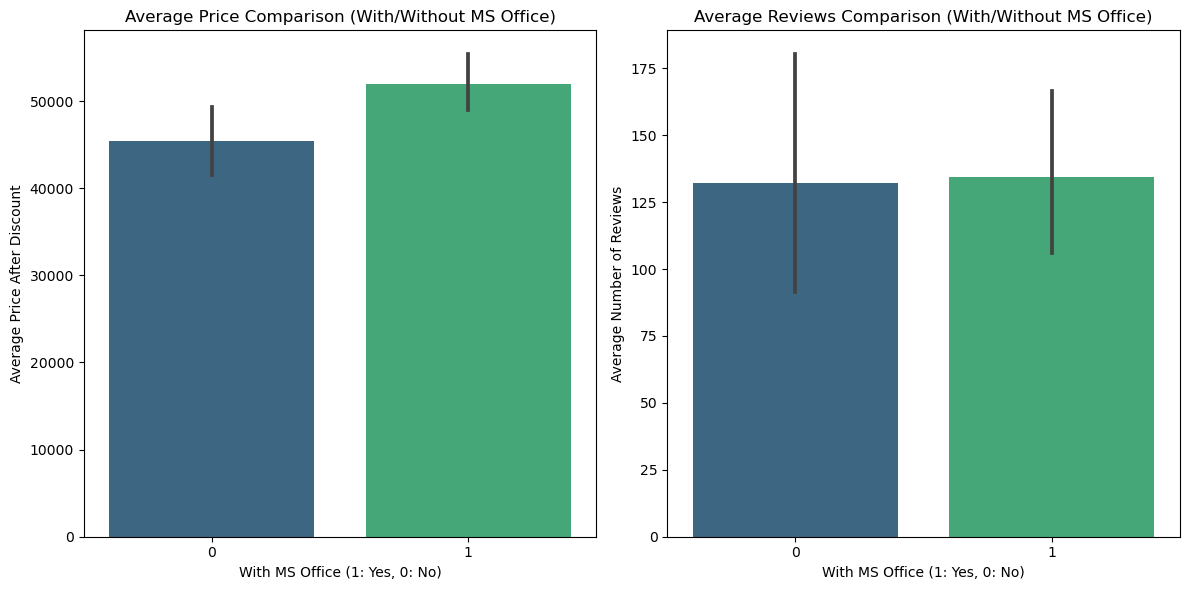

In [1080]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Ms_office', y='after_dis_price', data=df, palette='viridis')
plt.title('Average Price Comparison (With/Without MS Office)')
plt.xlabel('With MS Office (1: Yes, 0: No)')
plt.ylabel('Average Price After Discount')

plt.subplot(1, 2, 2)
sns.barplot(x='Ms_office', y='num_reviews', data=df, palette='viridis')
plt.title('Average Reviews Comparison (With/Without MS Office)')
plt.xlabel('With MS Office (1: Yes, 0: No)')
plt.ylabel('Average Number of Reviews')

plt.tight_layout()
plt.show()

**Observation:**
* systems with msoffice have higher average price as compared to those without it.
* there is a slight difference between the no of reviews between the two group.

**What percentage of laptops with Microsoft Office have a rating greater than 4?**

In [1096]:
a= df[df['Ms_office'] == 1].query('rating > 4').shape[0] / df[df['Ms_office'] == 1].shape[0] * 100
print("Percentage of laptops with Microsoft Office and rating > 4=",a)

Percentage of laptops with Microsoft Office and rating > 4= 90.80459770114942


**Observation:**
A very high percentage (90.80%) of laptops with Microsoft Office pre-installed have ratings above 4, indicating that most customers are highly satisfied with their purchase

**How does the discount percentage (discount) differ between laptops with Microsoft Office and those without it?**

In [1100]:
a = df.groupby('Ms_office')['discount'].mean()
print(a)


Ms_office
0    33.020000
1    29.948276
Name: discount, dtype: float64


**Observation:**
Laptops without Microsoft Office have a higher average discount, 33.02%, compared to laptops with Microsoft Office, 29.95%. This implies that laptops without Office may be sold at larger discounts

**What is the correlation between laptop weight and user rating, for laptops with Microsoft Office?**

In [1103]:
a= df[df['Ms_office'] == 1][['weight', 'rating']].corr()
print(a)


          weight    rating
weight  1.000000  0.145143
rating  0.145143  1.000000


**Observation:**
The correlation value of 0.145 indicates a very weak positive correlation between weight and rating. This suggests that as the weight of the laptop increases, its rating tends to increase slightly as well, but the relationship is weak.

**Which brand has the highest number of laptops with Microsoft Office?**

In [1106]:
a= df[df['Ms_office'] == 1]['brand'].value_counts().idxmax()
print("Brand with highest number of laptops with MS Office:",a)


Brand with highest number of laptops with MS Office: ASUS


**Do laptops with Microsoft Office have a higher or lower price drop compared to those without it?**

In [1109]:
a= df.groupby('Ms_office')['price_drop'].mean()
print(a)


Ms_office
0    21525.180000
1    22022.804598
Name: price_drop, dtype: float64


**Observation:**
Laptops that come with Microsoft Office pre-installed have a slightly higher average price drop (₹22,022.80) compared to laptops without Microsoft Office (₹21,525.18).

**What is the distribution of laptop prices (actual_price) for laptops with Microsoft Office?**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


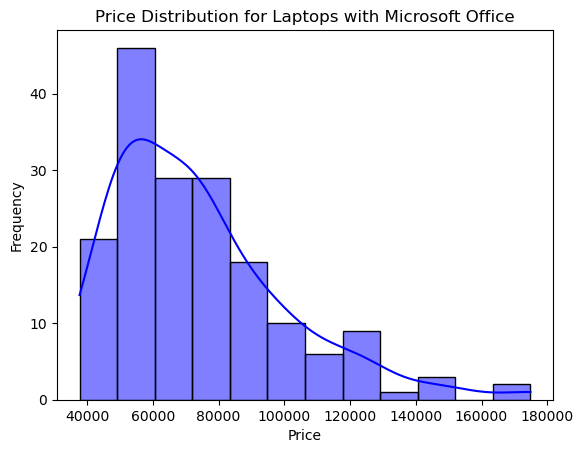

In [1112]:
sns.histplot(df[df['Ms_office'] == 1]['actual_price'], kde=True, color='blue')
plt.title('Price Distribution for Laptops with Microsoft Office')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Observation:**
The majority of laptops fall within the range of 35000 to 100000 and peak is around 50000.

**Which processor types (processor_type) are associated with the highest average user ratings?**

In [1125]:
a = df.groupby('processor_type')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)
print(a)


                         processor_type    rating
3          Apple M2 (Premium for Apple)  4.700000
15        Intel i7 (Unknown Generation)  4.400000
13        Intel i5 (Unknown Generation)  4.310000
2          AMD Ryzen 7 (Unknown Series)  4.288235
7                   Intel i3 (11th Gen)  4.285714
1          AMD Ryzen 5 (Unknown Series)  4.270000
10                  Intel i5 (10th Gen)  4.233333
12                  Intel i5 (12th Gen)  4.210294
8                   Intel i3 (12th Gen)  4.210204
0          AMD Ryzen 3 (Unknown Series)  4.204348
14                  Intel i7 (12th Gen)  4.200000
17                    Unknown Processor  4.190000
11                  Intel i5 (11th Gen)  4.180000
9         Intel i3 (Unknown Generation)  4.178571
16        Intel i9 (Unknown Generation)  4.125000
4             Intel Celeron (Quad Core)  4.050000
5   Intel Celeron (Single or Dual Core)  3.856250
6                   Intel i3 (10th Gen)  3.800000


**Observation:**
* Processors with high core  like Intel i7, Intel i9, and Apple M2 tend to get higher scores, probably due to their exceptional performance, efficiency, and multitasking capabilities.
* Budget processors, such as Intel Celeron and Intel i3 are generally low rated. They offer basic functionality without high-performance characteristics.

**Which brands offer the best value for money based on the value_for_money score?**

In [1128]:
a= df.groupby('brand')['value_for_money'].mean().reset_index()
b= a.loc[a['value_for_money'].idxmax()]
print("Best brand for value for money:",b)


Best brand for value for money: brand              Primebook
value_for_money     0.000195
Name: 12, dtype: object


**What percentage of laptops have a discount (discount) greater than 20%?**

In [1135]:
d= (df[df['discount'] > 20].shape[0] / df.shape[0]) * 100
print("Percentage of laptops with discount greater than 20=",d,"%")


Percentage of laptops with discount greater than 20= 84.5679012345679 %


**Observation:**
The fact that 84.57% of laptops are being offered with a discount greater than 20% suggests that large price reductions are a common practice in the market,

**What is the distribution of laptop weights (weight) for different brands?**

In [1138]:
a = df.groupby('brand')['weight'].describe()
print(a)


           count      mean       std    min     25%    50%     75%    max
brand                                                                    
ASUS        63.0  1.769841  0.299427  1.280  1.6300  1.700  1.8000  2.600
Acer        46.0  1.695870  0.371020  1.250  1.4600  1.590  1.7600  2.800
Apple        7.0  1.240000  0.000000  1.240  1.2400  1.240  1.2400  1.240
CHUWI        5.0  1.672000  0.152053  1.400  1.7400  1.740  1.7400  1.740
Colorful     4.0  2.297500  0.205000  1.990  2.2975  2.400  2.4000  2.400
DELL        19.0  1.641053  0.061091  1.490  1.6200  1.650  1.6550  1.830
GIGABYTE     1.0  2.080000       NaN  2.080  2.0800  2.080  2.0800  2.080
HP          57.0  1.691053  0.231074  1.350  1.5900  1.690  1.7500  2.370
Infinix     16.0  1.676250  0.308283  1.000  1.7750  1.780  1.7850  1.990
Lenovo      54.0  1.701111  0.318852  1.300  1.4700  1.620  1.8550  2.380
MICROSOFT    1.0  1.130000       NaN  1.130  1.1300  1.130  1.1300  1.130
MSI         20.0  1.752500  0.335510  

**How does the presence of a price drop (price_drop) impact the actual price (actual_price) of laptops?**

In [1143]:
a= df['price_drop'].corr(df['actual_price'])
print("correlation between price drop and actual_price=",a)


correlation between price drop and actual_price= 0.6330522300610479


**Correlation between numerical columns**

In [1150]:
a= ['actual_price', 'after_dis_price', 'rating', 'discount', 'num_ratings', 'num_reviews', 'ram', 'display_size','weight', 'price_drop', 'value_for_money']
b= df[a].corr()
print(b)


                 actual_price  after_dis_price    rating  discount  \
actual_price         1.000000         0.934925  0.431491 -0.235215   
after_dis_price      0.934925         1.000000  0.464009 -0.538796   
rating               0.431491         0.464009  1.000000 -0.310069   
discount            -0.235215        -0.538796 -0.310069  1.000000   
num_ratings         -0.056193         0.008244  0.247813 -0.124157   
num_reviews         -0.121568        -0.075826  0.207549 -0.038502   
ram                  0.698243         0.682048  0.291061 -0.285379   
display_size        -0.069337        -0.080184 -0.022700  0.051788   
weight               0.506972         0.445424  0.129312 -0.030628   
price_drop           0.633052         0.317167  0.140962  0.546762   
value_for_money     -0.856787        -0.782363 -0.354917  0.178659   

                 num_ratings  num_reviews       ram  display_size    weight  \
actual_price       -0.056193    -0.121568  0.698243     -0.069337  0.506972   
a

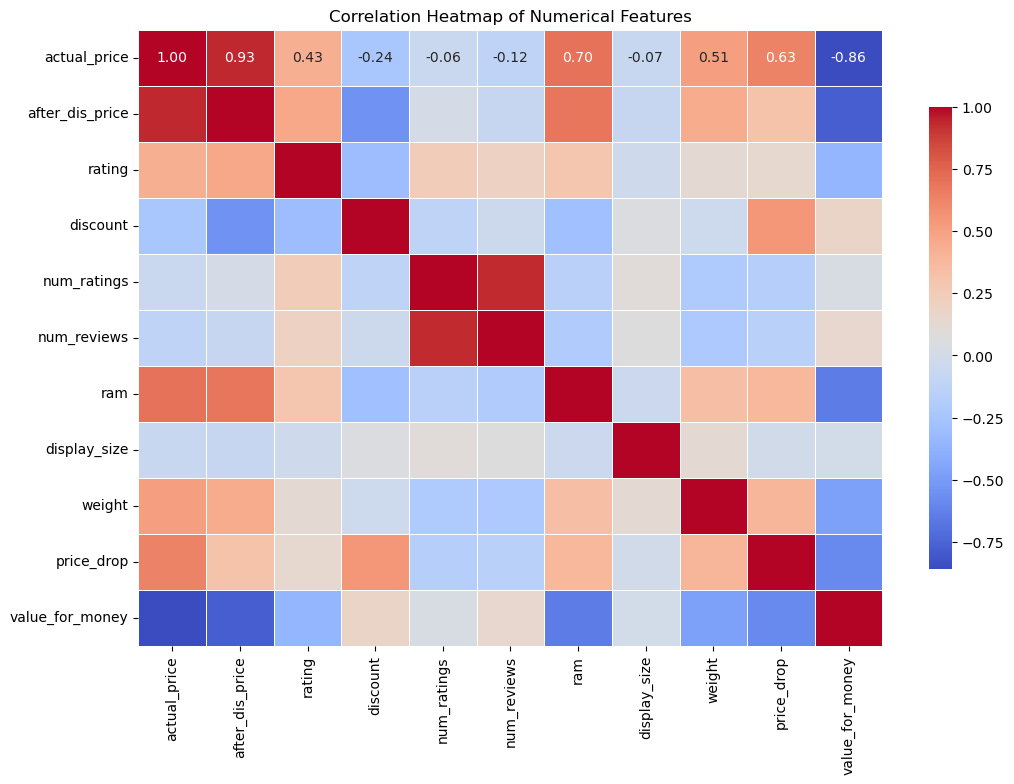

In [1152]:
plt.figure(figsize=(12, 8))
sns.heatmap(b, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.75})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observation:**
* Strong Correlation Between Actual Price and After Discount Price:
Actual Price and After Discount Price are highly positively correlated (0.93). This means that the discount does not significantly alter the price for most laptops-the discounted price is a close reflection of the original price, indicating that the discounts are relatively consistent across the dataset.

* Discount and Price Drop:
There is a strong positive correlation between discount and price drop (0.55). This means that greater discounts generally correspond to greater price drops. Vendors who offer much larger price reductions are also likely to be offering much bigger cuts of the "actual" price.

* Rating and Price:
There seems to be moderate positive correlation both with the real and after-discount price: actual price at rating 0.43, discount price at 0.46. Thus higher-rated laptops also tend to go for higher real prices and it is true with the discounts provided as well.
That being said the correlation isn't very high at its best; besides brand and even performance play vital roles in settling the prices among other things.

* Discount is positively correlated with value for money (0.18), but the relationship is fairly weak. Laptops with higher discounts tend to have a slightly better perceived "value for money," but other factors such as performance or features are likely more influential on this perception.
  
* RAM and Performance:
RAM is positively correlated with actual price (0.70) and after discount price (0.68), meaning that the higher the RAM, the more expensive the laptop. Also, RAM is moderately correlated with rating (0.29), which means that consumers often perceive laptops with higher RAM as performing better and therefore rate them higher.

* Price Drop and Weight:
Moderate correlation of price drop with weight (0.39) shows that heavier laptops tend to be sold at lower prices. It could be that the bulkier laptops are being discounted more heavily in order to make them more attractive to customers, or perhaps they are older models or low-spec systems.

* Ratings and Reviews:
Ratings are moderately correlated with number of reviews (0.25) and number of ratings (0.21), suggesting that laptops with higher ratings tend to attract more user feedback. However, the correlation is not high enough to suggest that ratings are solely dependent on the number of reviews or ratings.

* Value for Money:
It means that value for money is inversely correlated with actual price (-0.86) and after discount price (-0.78), implying that consumers perceive laptops as having less value for money as the prices increase even after discounts.

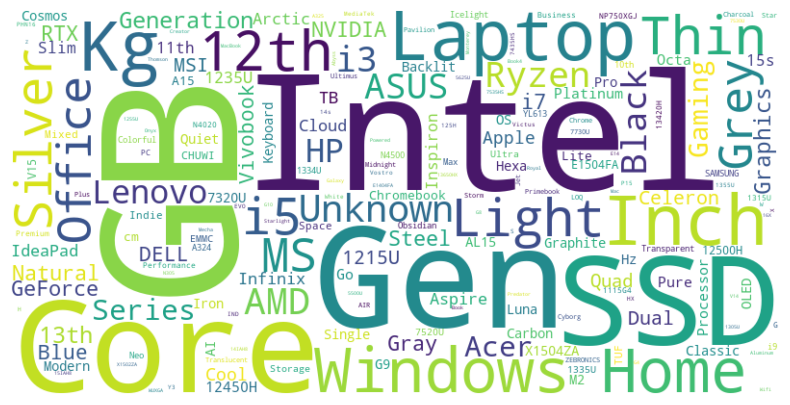

In [1169]:
text= ' '.join(df['title'].dropna()) + ' ' + ' '.join(df['brand'].dropna()) + ' ' + ' '.join(df['processor_type'].dropna()) + ' ' + ' '.join(df['color'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=None,collocations=False).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

In [1165]:
df.head()

,title,actual_price,after_dis_price,link,rating,discount,num_ratings,num_reviews,brand,ram,display_size,weight,color,price_drop,discount_range,value_for_money,is_gaming,processor_type,Ms_office
0,Lenovo IdeaPad Slim 3 Intel Core i3 12th Gen 1...,58890.0,31990.0,https://www.flipkart.com/lenovo-ideapad-slim-3...,4.3,45,1558,86,Lenovo,8.0,39.62,1.63,Arctic Grey,26900.0,40-50%,0.000073,False,Intel i3 (12th Gen),1
1,CHUWI Intel Celeron Dual Core 11th Gen N4020 -...,39990.0,18990.0,https://www.flipkart.com/chuwi-intel-celeron-d...,3.7,52,1112,129,CHUWI,8.0,15.60,1.74,Grey,21000.0,50-60%,0.000093,False,Intel Celeron (Single or Dual Core),0
2,Infinix Y3 Max Series Intel Core i5 12th Gen 1...,69990.0,29990.0,https://www.flipkart.com/infinix-y3-max-series...,4.2,57,64,13,Infinix,16.0,16.00,1.78,Silver,40000.0,50-60%,0.000060,False,Intel i5 (12th Gen),0
3,Lenovo IdeaPad Slim 1 AMD Ryzen 5 Hexa Core 55...,58390.0,36990.0,https://www.flipkart.com/lenovo-ideapad-slim-1...,4.2,36,5823,509,Lenovo,16.0,39.62,1.65,Cloud Grey,21400.0,30-40%,0.000072,False,AMD Ryzen 5 (Unknown Series),1
4,Infinix Y3 Max Series Intel Core i5 12th Gen 1...,69990.0,29990.0,https://www.flipkart.com/infinix-y3-max-series...,4.2,57,64,13,Infinix,16.0,16.00,1.78,Blue,40000.0,50-60%,0.000060,False,Intel i5 (12th Gen),0


In [1167]:
df.to_csv('Laptop_Data.csv')